In [1]:
from RL.agents.REINFORCE import REINFORCE
from RL.agents.A_C import A_C

from RL.environment import env
from RL.recom_papers.recom_papers import *
from RL.RUN import run

import time
import pandas as pd
import numpy as np
import pickle

import torch
from torch.autograd import Variable
import torch.nn.utils as utils
import torch.autograd as autograd
from torchtext import data

from statistics import median
import matplotlib.pyplot as plt
import networkx as nx

# All drugs

In [2]:
drugs = ['trametinib',
         'fulvestrant',
         'lovastatin',
         'abiraterone',
         'thalidomide',
         'sirolimus',
         'simvastatin',
         'methotrexate',
         'bortezomib',
         'gemcitabine',
         'tamoxifen',
         'dexamethasone',
         'doxorubicin']
len(drugs)

13

# Read data

In [3]:
data_root = './data/'

In [4]:
alllab_df = pd.read_csv(data_root+'lab_finfin.csv')
alllab_df.head()

,drug,file,lab,comment
0,tamoxifen,PMC003XXXXXX.xml\PMC0030XXXXX\PMC3000794.xml,0,none
1,tamoxifen,PMC003XXXXXX.xml\PMC0030XXXXX\PMC3005955.xml,0,none
2,tamoxifen,PMC003XXXXXX.xml\PMC0030XXXXX\PMC3010527.xml,0,none
3,tamoxifen,PMC003XXXXXX.xml\PMC0030XXXXX\PMC3011858.xml,0,none
4,tamoxifen,PMC003XXXXXX.xml\PMC0030XXXXX\PMC3014261.xml,0,none


In [5]:
allfea_df = pd.read_csv(data_root+'fea_finfin.csv')
allfea_df['features'] = allfea_df['title'] + ' '+allfea_df['abstract']
allfea_df = allfea_df.drop(columns=['title', 'abstract'])
allfea_df.head()

,file,features
0,PMC003XXXXXX.xml\PMC0030XXXXX\PMC3000794.xml,erk1 2 dependent vascular endothelial growth f...
1,PMC003XXXXXX.xml\PMC0030XXXXX\PMC3001231.xml,peg functionalized magnetic nanoparticles for ...
2,PMC003XXXXXX.xml\PMC0030XXXXX\PMC3003872.xml,combination testing \( stage 2 \) of rapamycin...
3,PMC003XXXXXX.xml\PMC0030XXXXX\PMC3004744.xml,durable responses with the metronomic regimen ...
4,PMC003XXXXXX.xml\PMC0030XXXXX\PMC3005850.xml,ph sensitive ionomeric particles obtained via ...


# Build Vocabulary

In [6]:
start_t = time.time()

text_field = data.Field(lower=True) # Text field
fields = [('text', text_field)]

examples = []

for drug in drugs:
    examples.append(data.Example.fromlist([drug], fields))
    for file in alllab_df[alllab_df['drug']==drug]['file']:
        for feature in allfea_df[allfea_df['file']==file]['features']:
            if isinstance(feature, str):
                example = feature + " gene"
                examples.append(data.Example.fromlist([example], fields))

dataset = data.Dataset(examples, fields) # Create dataset object

text_field.build_vocab(dataset)
print(len(text_field.vocab.stoi))

time.time() - start_t

25695


4.120816230773926

# RL Models

In [7]:
model_dir_root = './trained_models/'

In [8]:
# Initial Papers from Baseline Model.
paper_list = {'bortezomib': 'PMC004XXXXXX.xml\\PMC0042XXXXX\\PMC4266584.xml',
              'gemcitabine': 'PMC004XXXXXX.xml\\PMC0048XXXXX\\PMC4873426.xml',
              'tamoxifen': 'PMC003XXXXXX.xml\\PMC0037XXXXX\\PMC3711713.xml',
              'dexamethasone': 'PMC004XXXXXX.xml\\PMC0044XXXXX\\PMC4422178.xml',
              'doxorubicin': 'PMC003XXXXXX.xml\\PMC0032XXXXX\\PMC3298037.xml'}

## RL REINFORCE

In [9]:
agent = REINFORCE(text_field, action_size=20, model_dir=model_dir_root+'rl_ta_baseline20a0001_r_9_model.pkl')
res = run(drugs[8:], agent, text_field, allfea_df, alllab_df,  train=False, action_size=20, weight = False, max_episode = 3, hybrid=paper_list)

  3%|▎         | 10/370 [00:00<00:03, 91.92it/s]

Starting Converting:
End of Converting.
# drug: bortezomib ###############
# Total: 371 ##############
##########################
The 0th episode
PMC004XXXXXX.xml\PMC0042XXXXX\PMC4266584.xml


  2%|▏         | 9/370 [00:00<00:04, 89.56it/s]

# of papers to read:  112  Time elapse (min):  0.0203130046526591 ============================================
The 1th episode
PMC004XXXXXX.xml\PMC0042XXXXX\PMC4266584.xml


  3%|▎         | 11/370 [00:00<00:03, 104.22it/s]

# of papers to read:  112  Time elapse (min):  0.038286070028940834 ============================================
The 2th episode
PMC004XXXXXX.xml\PMC0042XXXXX\PMC4266584.xml


  2%|▏         | 7/414 [00:00<00:05, 68.79it/s]

# of papers to read:  112  Time elapse (min):  0.057532485326131186 ============================================
Starting Converting:
End of Converting.
# drug: gemcitabine ###############
# Total: 415 ##############
##########################
The 0th episode
PMC004XXXXXX.xml\PMC0048XXXXX\PMC4873426.xml


  2%|▏         | 9/414 [00:00<00:04, 87.00it/s]

# of papers to read:  46  Time elapse (min):  0.010005601247151693 ============================================
The 1th episode
PMC004XXXXXX.xml\PMC0048XXXXX\PMC4873426.xml


  2%|▏         | 9/414 [00:00<00:04, 87.63it/s]

# of papers to read:  46  Time elapse (min):  0.018018515904744466 ============================================
The 2th episode
PMC004XXXXXX.xml\PMC0048XXXXX\PMC4873426.xml


  2%|▏         | 9/525 [00:00<00:06, 84.95it/s]

# of papers to read:  46  Time elapse (min):  0.026254252592722575 ============================================
Starting Converting:
End of Converting.
# drug: tamoxifen ###############
# Total: 526 ##############
##########################
The 0th episode
PMC003XXXXXX.xml\PMC0037XXXXX\PMC3711713.xml


  1%|▏         | 7/525 [00:00<00:07, 65.59it/s]

# of papers to read:  36  Time elapse (min):  0.0084145983060201 ============================================
The 1th episode
PMC003XXXXXX.xml\PMC0037XXXXX\PMC3711713.xml


  2%|▏         | 9/525 [00:00<00:06, 82.40it/s]

# of papers to read:  36  Time elapse (min):  0.016988329092661538 ============================================
The 2th episode
PMC003XXXXXX.xml\PMC0037XXXXX\PMC3711713.xml


  1%|▏         | 8/564 [00:00<00:07, 78.33it/s]

# of papers to read:  36  Time elapse (min):  0.02430698076883952 ============================================
Starting Converting:
End of Converting.
# drug: dexamethasone ###############
# Total: 565 ##############
##########################
The 0th episode
PMC004XXXXXX.xml\PMC0044XXXXX\PMC4422178.xml


  2%|▏         | 9/564 [00:00<00:06, 83.90it/s]

# of papers to read:  74  Time elapse (min):  0.018248446782430015 ============================================
The 1th episode
PMC004XXXXXX.xml\PMC0044XXXXX\PMC4422178.xml


  1%|          | 7/564 [00:00<00:08, 65.13it/s]

# of papers to read:  74  Time elapse (min):  0.035710497697194414 ============================================
The 2th episode
PMC004XXXXXX.xml\PMC0044XXXXX\PMC4422178.xml


  0%|          | 0/803 [00:00<?, ?it/s]

# of papers to read:  74  Time elapse (min):  0.05197482903798421 ============================================
Starting Converting:
End of Converting.
# drug: doxorubicin ###############
# Total: 804 ##############
##########################
The 0th episode
PMC003XXXXXX.xml\PMC0032XXXXX\PMC3298037.xml


  1%|          | 8/803 [00:00<00:10, 73.36it/s]

# of papers to read:  491  Time elapse (min):  0.13295085430145265 ============================================
The 1th episode
PMC003XXXXXX.xml\PMC0032XXXXX\PMC3298037.xml


  1%|          | 8/803 [00:00<00:10, 78.48it/s]

# of papers to read:  491  Time elapse (min):  0.2689866542816162 ============================================
The 2th episode
PMC003XXXXXX.xml\PMC0032XXXXX\PMC3298037.xml


 61%|██████    | 489/803 [00:07<00:05, 61.97it/s]

# of papers to read:  491  Time elapse (min):  0.40072556734085085 ============================================


## RL A2C

In [10]:
agent = A_C(text_field, action_size=20, model_dir=model_dir_root+'rl_ta_20ACW_r_84_model.pkl')
res2 = run(drugs[8:], agent, text_field, allfea_df, alllab_df,  train=False, action_size=20, A_C=True, weight=True, max_episode = 30,  hybrid=paper_list, log=False)
for drug in res2:
    print(drug, " ", median(res2[drug]))

  0%|          | 0/370 [00:00<?, ?it/s]

Starting Converting:
End of Converting.
# drug: bortezomib ###############
# Total: 371 ##############
##########################
The 0th episode
PMC004XXXXXX.xml\PMC0042XXXXX\PMC4266584.xml


  3%|▎         | 11/370 [00:00<00:03, 102.11it/s]

# of papers to read:  98  Time elapse (min):  0.019482147693634034 ============================================
The 1th episode
PMC004XXXXXX.xml\PMC0042XXXXX\PMC4266584.xml


  2%|▏         | 9/370 [00:00<00:04, 82.23it/s]

# of papers to read:  71  Time elapse (min):  0.030939984321594238 ============================================
The 2th episode
PMC004XXXXXX.xml\PMC0042XXXXX\PMC4266584.xml


  2%|▏         | 7/370 [00:00<00:05, 65.13it/s]

# of papers to read:  36  Time elapse (min):  0.04023573001225789 ============================================
The 3th episode
PMC004XXXXXX.xml\PMC0042XXXXX\PMC4266584.xml


  3%|▎         | 11/370 [00:00<00:03, 102.38it/s]

# of papers to read:  139  Time elapse (min):  0.06594061454137166 ============================================
The 4th episode
PMC004XXXXXX.xml\PMC0042XXXXX\PMC4266584.xml


  3%|▎         | 11/370 [00:00<00:03, 101.45it/s]

# of papers to read:  81  Time elapse (min):  0.0798139492670695 ============================================
The 5th episode
PMC004XXXXXX.xml\PMC0042XXXXX\PMC4266584.xml


  3%|▎         | 10/370 [00:00<00:04, 87.98it/s]

# of papers to read:  36  Time elapse (min):  0.08601038455963135 ============================================
The 6th episode
PMC004XXXXXX.xml\PMC0042XXXXX\PMC4266584.xml


  2%|▏         | 6/370 [00:00<00:06, 58.39it/s]

# of papers to read:  68  Time elapse (min):  0.09928280115127563 ============================================
The 7th episode
PMC004XXXXXX.xml\PMC0042XXXXX\PMC4266584.xml


  2%|▏         | 9/370 [00:00<00:04, 85.01it/s]

# of papers to read:  45  Time elapse (min):  0.1098231832186381 ============================================
The 8th episode
PMC004XXXXXX.xml\PMC0042XXXXX\PMC4266584.xml


  3%|▎         | 11/370 [00:00<00:03, 106.12it/s]

# of papers to read:  111  Time elapse (min):  0.13170928557713826 ============================================
The 9th episode
PMC004XXXXXX.xml\PMC0042XXXXX\PMC4266584.xml


  2%|▏         | 9/370 [00:00<00:04, 87.35it/s]

# of papers to read:  112  Time elapse (min):  0.1529518167177836 ============================================
The 10th episode
PMC004XXXXXX.xml\PMC0042XXXXX\PMC4266584.xml


  2%|▏         | 7/370 [00:00<00:05, 65.51it/s]

# of papers to read:  125  Time elapse (min):  0.17807406584421795 ============================================
The 11th episode
PMC004XXXXXX.xml\PMC0042XXXXX\PMC4266584.xml


  3%|▎         | 11/370 [00:00<00:03, 103.81it/s]

# of papers to read:  74  Time elapse (min):  0.1950705647468567 ============================================
The 12th episode
PMC004XXXXXX.xml\PMC0042XXXXX\PMC4266584.xml


  3%|▎         | 10/370 [00:00<00:03, 93.36it/s]

# of papers to read:  33  Time elapse (min):  0.20085611740748088 ============================================
The 13th episode
PMC004XXXXXX.xml\PMC0042XXXXX\PMC4266584.xml


  1%|▏         | 5/370 [00:00<00:07, 48.99it/s]

# of papers to read:  110  Time elapse (min):  0.22336291869481403 ============================================
The 14th episode
PMC004XXXXXX.xml\PMC0042XXXXX\PMC4266584.xml


  2%|▏         | 6/370 [00:00<00:06, 58.81it/s]

# of papers to read:  38  Time elapse (min):  0.23134156465530395 ============================================
The 15th episode
PMC004XXXXXX.xml\PMC0042XXXXX\PMC4266584.xml


  3%|▎         | 10/370 [00:00<00:03, 91.81it/s]

# of papers to read:  146  Time elapse (min):  0.26152453422546384 ============================================
The 16th episode
PMC004XXXXXX.xml\PMC0042XXXXX\PMC4266584.xml


  2%|▏         | 9/370 [00:00<00:04, 78.78it/s]

# of papers to read:  88  Time elapse (min):  0.2777481317520142 ============================================
The 17th episode
PMC004XXXXXX.xml\PMC0042XXXXX\PMC4266584.xml


  2%|▏         | 8/370 [00:00<00:04, 78.20it/s]

# of papers to read:  132  Time elapse (min):  0.3060856024424235 ============================================
The 18th episode
PMC004XXXXXX.xml\PMC0042XXXXX\PMC4266584.xml


  2%|▏         | 7/370 [00:00<00:05, 69.21it/s]

# of papers to read:  121  Time elapse (min):  0.33290571769078575 ============================================
The 19th episode
PMC004XXXXXX.xml\PMC0042XXXXX\PMC4266584.xml


  3%|▎         | 12/370 [00:00<00:03, 119.08it/s]

# of papers to read:  109  Time elapse (min):  0.3540956497192383 ============================================
The 20th episode
PMC004XXXXXX.xml\PMC0042XXXXX\PMC4266584.xml


  0%|          | 0/370 [00:00<?, ?it/s]

# of papers to read:  29  Time elapse (min):  0.35814495086669923 ============================================
The 21th episode
PMC004XXXXXX.xml\PMC0042XXXXX\PMC4266584.xml
# of papers to read:  13  Time elapse (min):  0.35992093086242677 ============================================
The 22th episode
PMC004XXXXXX.xml\PMC0042XXXXX\PMC4266584.xml


  3%|▎         | 12/370 [00:00<00:03, 115.36it/s]

# of papers to read:  41  Time elapse (min):  0.365666401386261 ============================================
The 23th episode
PMC004XXXXXX.xml\PMC0042XXXXX\PMC4266584.xml


  3%|▎         | 12/370 [00:00<00:03, 118.95it/s]

# of papers to read:  85  Time elapse (min):  0.3774360696474711 ============================================
The 24th episode
PMC004XXXXXX.xml\PMC0042XXXXX\PMC4266584.xml


  4%|▎         | 13/370 [00:00<00:02, 120.70it/s]

# of papers to read:  28  Time elapse (min):  0.3812748670578003 ============================================
The 25th episode
PMC004XXXXXX.xml\PMC0042XXXXX\PMC4266584.xml


  3%|▎         | 12/370 [00:00<00:03, 117.09it/s]

# of papers to read:  27  Time elapse (min):  0.38512738545735675 ============================================
The 26th episode
PMC004XXXXXX.xml\PMC0042XXXXX\PMC4266584.xml


  3%|▎         | 12/370 [00:00<00:03, 119.29it/s]

# of papers to read:  69  Time elapse (min):  0.3947479645411173 ============================================
The 27th episode
PMC004XXXXXX.xml\PMC0042XXXXX\PMC4266584.xml


  3%|▎         | 11/370 [00:00<00:03, 107.26it/s]

# of papers to read:  35  Time elapse (min):  0.399557634194692 ============================================
The 28th episode
PMC004XXXXXX.xml\PMC0042XXXXX\PMC4266584.xml


  3%|▎         | 12/370 [00:00<00:03, 115.41it/s]

# of papers to read:  70  Time elapse (min):  0.4096687356630961 ============================================
The 29th episode
PMC004XXXXXX.xml\PMC0042XXXXX\PMC4266584.xml


  3%|▎         | 11/414 [00:00<00:03, 106.08it/s]

# of papers to read:  106  Time elapse (min):  0.4258909503618876 ============================================
Starting Converting:
End of Converting.
# drug: gemcitabine ###############
# Total: 415 ##############
##########################
The 0th episode
PMC004XXXXXX.xml\PMC0048XXXXX\PMC4873426.xml


  3%|▎         | 11/414 [00:00<00:03, 109.19it/s]

# of papers to read:  54  Time elapse (min):  0.008108035723368327 ============================================
The 1th episode
PMC004XXXXXX.xml\PMC0048XXXXX\PMC4873426.xml


  2%|▏         | 9/414 [00:00<00:04, 82.93it/s]

# of papers to read:  54  Time elapse (min):  0.03182752132415771 ============================================
The 2th episode
PMC004XXXXXX.xml\PMC0048XXXXX\PMC4873426.xml


  0%|          | 0/414 [00:00<?, ?it/s]

# of papers to read:  46  Time elapse (min):  0.04114588499069214 ============================================
The 3th episode
PMC004XXXXXX.xml\PMC0048XXXXX\PMC4873426.xml
# of papers to read:  4  Time elapse (min):  0.04194350242614746 ============================================
The 4th episode
PMC004XXXXXX.xml\PMC0048XXXXX\PMC4873426.xml
# of papers to read:  4  Time elapse (min):  0.04290072123209635 ============================================
The 5th episode
PMC004XXXXXX.xml\PMC0048XXXXX\PMC4873426.xml
# of papers to read:  4  Time elapse (min):  0.04402360518773397 ============================================
The 6th episode
PMC004XXXXXX.xml\PMC0048XXXXX\PMC4873426.xml


  0%|          | 0/414 [00:00<?, ?it/s]

# of papers to read:  4  Time elapse (min):  0.050158250331878665 ============================================
The 7th episode
PMC004XXXXXX.xml\PMC0048XXXXX\PMC4873426.xml
# of papers to read:  4  Time elapse (min):  0.05141286849975586 ============================================
The 8th episode
PMC004XXXXXX.xml\PMC0048XXXXX\PMC4873426.xml
# of papers to read:  4  Time elapse (min):  0.05213793913523356 ============================================
The 9th episode
PMC004XXXXXX.xml\PMC0048XXXXX\PMC4873426.xml
# of papers to read:  4  Time elapse (min):  0.05305218696594238 ============================================
The 10th episode
PMC004XXXXXX.xml\PMC0048XXXXX\PMC4873426.xml


  1%|          | 3/414 [00:00<00:14, 29.31it/s]

# of papers to read:  4  Time elapse (min):  0.05397580464680989 ============================================
The 11th episode
PMC004XXXXXX.xml\PMC0048XXXXX\PMC4873426.xml
# of papers to read:  4  Time elapse (min):  0.054737432797749834 ============================================
The 12th episode
PMC004XXXXXX.xml\PMC0048XXXXX\PMC4873426.xml


  2%|▏         | 9/414 [00:00<00:04, 84.98it/s]

# of papers to read:  38  Time elapse (min):  0.07212681770324707 ============================================
The 13th episode
PMC004XXXXXX.xml\PMC0048XXXXX\PMC4873426.xml
# of papers to read:  4  Time elapse (min):  0.07270026604334513 ============================================
The 14th episode
PMC004XXXXXX.xml\PMC0048XXXXX\PMC4873426.xml


  2%|▏         | 7/414 [00:00<00:06, 60.86it/s]

# of papers to read:  33  Time elapse (min):  0.07893008788426717 ============================================
The 15th episode
PMC004XXXXXX.xml\PMC0048XXXXX\PMC4873426.xml


  0%|          | 0/414 [00:00<?, ?it/s]

# of papers to read:  56  Time elapse (min):  0.09155903657277426 ============================================
The 16th episode
PMC004XXXXXX.xml\PMC0048XXXXX\PMC4873426.xml
# of papers to read:  4  Time elapse (min):  0.09233538707097372 ============================================
The 17th episode
PMC004XXXXXX.xml\PMC0048XXXXX\PMC4873426.xml
# of papers to read:  4  Time elapse (min):  0.0930957039197286 ============================================
The 18th episode
PMC004XXXXXX.xml\PMC0048XXXXX\PMC4873426.xml
# of papers to read:  4  Time elapse (min):  0.09387162129084269 ============================================
The 19th episode
PMC004XXXXXX.xml\PMC0048XXXXX\PMC4873426.xml
# of papers to read:  4  Time elapse (min):  0.09451335271199544 ============================================
The 20th episode
PMC004XXXXXX.xml\PMC0048XXXXX\PMC4873426.xml


  0%|          | 0/414 [00:00<?, ?it/s]

# of papers to read:  4  Time elapse (min):  0.09522280295689901 ============================================
The 21th episode
PMC004XXXXXX.xml\PMC0048XXXXX\PMC4873426.xml
# of papers to read:  4  Time elapse (min):  0.09587228695551554 ============================================
The 22th episode
PMC004XXXXXX.xml\PMC0048XXXXX\PMC4873426.xml
# of papers to read:  4  Time elapse (min):  0.09649563233057658 ============================================
The 23th episode
PMC004XXXXXX.xml\PMC0048XXXXX\PMC4873426.xml
# of papers to read:  4  Time elapse (min):  0.097181769212087 ============================================
The 24th episode
PMC004XXXXXX.xml\PMC0048XXXXX\PMC4873426.xml


  3%|▎         | 12/414 [00:00<00:03, 110.98it/s]

# of papers to read:  26  Time elapse (min):  0.10178721745808919 ============================================
The 25th episode
PMC004XXXXXX.xml\PMC0048XXXXX\PMC4873426.xml
# of papers to read:  4  Time elapse (min):  0.10240788459777832 ============================================
The 26th episode
PMC004XXXXXX.xml\PMC0048XXXXX\PMC4873426.xml
# of papers to read:  4  Time elapse (min):  0.10308595101038615 ============================================
The 27th episode
PMC004XXXXXX.xml\PMC0048XXXXX\PMC4873426.xml


  0%|          | 0/414 [00:00<?, ?it/s]

# of papers to read:  35  Time elapse (min):  0.1111253023147583 ============================================
The 28th episode
PMC004XXXXXX.xml\PMC0048XXXXX\PMC4873426.xml


  2%|▏         | 9/414 [00:00<00:04, 86.53it/s]

# of papers to read:  4  Time elapse (min):  0.11610740025838216 ============================================
The 29th episode
PMC004XXXXXX.xml\PMC0048XXXXX\PMC4873426.xml


  2%|▏         | 10/525 [00:00<00:05, 96.02it/s]

# of papers to read:  83  Time elapse (min):  0.13673231999079385 ============================================
Starting Converting:
End of Converting.
# drug: tamoxifen ###############
# Total: 526 ##############
##########################
The 0th episode
PMC003XXXXXX.xml\PMC0037XXXXX\PMC3711713.xml


  2%|▏         | 11/525 [00:00<00:05, 102.71it/s]

# of papers to read:  32  Time elapse (min):  0.0058507164319356285 ============================================
The 1th episode
PMC003XXXXXX.xml\PMC0037XXXXX\PMC3711713.xml


  2%|▏         | 9/525 [00:00<00:05, 87.01it/s]

# of papers to read:  35  Time elapse (min):  0.01166531244913737 ============================================
The 2th episode
PMC003XXXXXX.xml\PMC0037XXXXX\PMC3711713.xml


  2%|▏         | 10/525 [00:00<00:05, 95.75it/s]

# of papers to read:  42  Time elapse (min):  0.019002199172973633 ============================================
The 3th episode
PMC003XXXXXX.xml\PMC0037XXXXX\PMC3711713.xml


  2%|▏         | 10/525 [00:00<00:05, 94.65it/s]

# of papers to read:  47  Time elapse (min):  0.027220467726389568 ============================================
The 4th episode
PMC003XXXXXX.xml\PMC0037XXXXX\PMC3711713.xml


  2%|▏         | 10/525 [00:00<00:05, 90.79it/s]

# of papers to read:  165  Time elapse (min):  0.09772521654764811 ============================================
The 5th episode
PMC003XXXXXX.xml\PMC0037XXXXX\PMC3711713.xml


  2%|▏         | 9/525 [00:00<00:06, 85.87it/s]

# of papers to read:  37  Time elapse (min):  0.10560566584269206 ============================================
The 6th episode
PMC003XXXXXX.xml\PMC0037XXXXX\PMC3711713.xml


  2%|▏         | 10/525 [00:00<00:05, 90.72it/s]

# of papers to read:  162  Time elapse (min):  0.15042609771092733 ============================================
The 7th episode
PMC003XXXXXX.xml\PMC0037XXXXX\PMC3711713.xml


  2%|▏         | 9/525 [00:00<00:06, 84.41it/s]

# of papers to read:  30  Time elapse (min):  0.15618569850921632 ============================================
The 8th episode
PMC003XXXXXX.xml\PMC0037XXXXX\PMC3711713.xml


  2%|▏         | 8/525 [00:00<00:06, 77.55it/s]

# of papers to read:  61  Time elapse (min):  0.16983273426691692 ============================================
The 9th episode
PMC003XXXXXX.xml\PMC0037XXXXX\PMC3711713.xml


  2%|▏         | 9/525 [00:00<00:05, 86.99it/s]

# of papers to read:  168  Time elapse (min):  0.20166751543680828 ============================================
The 10th episode
PMC003XXXXXX.xml\PMC0037XXXXX\PMC3711713.xml


  2%|▏         | 10/525 [00:00<00:05, 98.37it/s]

# of papers to read:  37  Time elapse (min):  0.20853000084559123 ============================================
The 11th episode
PMC003XXXXXX.xml\PMC0037XXXXX\PMC3711713.xml


  0%|          | 0/525 [00:00<?, ?it/s]

# of papers to read:  143  Time elapse (min):  0.24943671226501465 ============================================
The 12th episode
PMC003XXXXXX.xml\PMC0037XXXXX\PMC3711713.xml


  2%|▏         | 10/525 [00:00<00:05, 92.91it/s]

# of papers to read:  166  Time elapse (min):  0.31502724885940553 ============================================
The 13th episode
PMC003XXXXXX.xml\PMC0037XXXXX\PMC3711713.xml


  2%|▏         | 9/525 [00:00<00:05, 89.13it/s]

# of papers to read:  48  Time elapse (min):  0.3253513177235921 ============================================
The 14th episode
PMC003XXXXXX.xml\PMC0037XXXXX\PMC3711713.xml


  2%|▏         | 10/525 [00:00<00:05, 97.87it/s]

# of papers to read:  39  Time elapse (min):  0.3321387489636739 ============================================
The 15th episode
PMC003XXXXXX.xml\PMC0037XXXXX\PMC3711713.xml


  2%|▏         | 10/525 [00:00<00:05, 99.91it/s]

# of papers to read:  100  Time elapse (min):  0.3601553479830424 ============================================
The 16th episode
PMC003XXXXXX.xml\PMC0037XXXXX\PMC3711713.xml


  2%|▏         | 10/525 [00:00<00:05, 92.95it/s]

# of papers to read:  51  Time elapse (min):  0.369667915503184 ============================================
The 17th episode
PMC003XXXXXX.xml\PMC0037XXXXX\PMC3711713.xml


  2%|▏         | 10/525 [00:00<00:05, 91.52it/s]

# of papers to read:  24  Time elapse (min):  0.3737310965855916 ============================================
The 18th episode
PMC003XXXXXX.xml\PMC0037XXXXX\PMC3711713.xml


  2%|▏         | 10/525 [00:00<00:05, 96.72it/s]

# of papers to read:  39  Time elapse (min):  0.38040361801783246 ============================================
The 19th episode
PMC003XXXXXX.xml\PMC0037XXXXX\PMC3711713.xml


  2%|▏         | 11/525 [00:00<00:05, 100.06it/s]

# of papers to read:  55  Time elapse (min):  0.38948575258255 ============================================
The 20th episode
PMC003XXXXXX.xml\PMC0037XXXXX\PMC3711713.xml


  2%|▏         | 9/525 [00:00<00:05, 88.88it/s]

# of papers to read:  118  Time elapse (min):  0.410209862391154 ============================================
The 21th episode
PMC003XXXXXX.xml\PMC0037XXXXX\PMC3711713.xml


  2%|▏         | 10/525 [00:00<00:05, 96.90it/s]

# of papers to read:  115  Time elapse (min):  0.4298561652501424 ============================================
The 22th episode
PMC003XXXXXX.xml\PMC0037XXXXX\PMC3711713.xml


  2%|▏         | 10/525 [00:00<00:06, 80.45it/s]

# of papers to read:  47  Time elapse (min):  0.437579349676768 ============================================
The 23th episode
PMC003XXXXXX.xml\PMC0037XXXXX\PMC3711713.xml


  1%|          | 6/525 [00:00<00:09, 55.48it/s]

# of papers to read:  189  Time elapse (min):  0.47531950076421103 ============================================
The 24th episode
PMC003XXXXXX.xml\PMC0037XXXXX\PMC3711713.xml


  2%|▏         | 9/525 [00:00<00:05, 87.70it/s]

# of papers to read:  191  Time elapse (min):  0.5212316672007243 ============================================
The 25th episode
PMC003XXXXXX.xml\PMC0037XXXXX\PMC3711713.xml


  2%|▏         | 8/525 [00:00<00:06, 79.82it/s]

# of papers to read:  36  Time elapse (min):  0.5290044824282328 ============================================
The 26th episode
PMC003XXXXXX.xml\PMC0037XXXXX\PMC3711713.xml


  2%|▏         | 9/525 [00:00<00:06, 81.88it/s]

# of papers to read:  135  Time elapse (min):  0.5637273788452148 ============================================
The 27th episode
PMC003XXXXXX.xml\PMC0037XXXXX\PMC3711713.xml


  1%|          | 6/525 [00:00<00:08, 58.51it/s]

# of papers to read:  39  Time elapse (min):  0.5777989506721497 ============================================
The 28th episode
PMC003XXXXXX.xml\PMC0037XXXXX\PMC3711713.xml


  1%|          | 6/525 [00:00<00:09, 56.32it/s]

# of papers to read:  48  Time elapse (min):  0.5948166012763977 ============================================
The 29th episode
PMC003XXXXXX.xml\PMC0037XXXXX\PMC3711713.xml


  2%|▏         | 9/564 [00:00<00:06, 80.97it/s]

# of papers to read:  151  Time elapse (min):  0.6445780316988627 ============================================
Starting Converting:
End of Converting.
# drug: dexamethasone ###############
# Total: 565 ##############
##########################
The 0th episode
PMC004XXXXXX.xml\PMC0044XXXXX\PMC4422178.xml


  1%|          | 3/564 [00:00<00:23, 23.68it/s]

# of papers to read:  111  Time elapse (min):  0.026505982875823973 ============================================
The 1th episode
PMC004XXXXXX.xml\PMC0044XXXXX\PMC4422178.xml


  2%|▏         | 9/564 [00:00<00:06, 80.84it/s]

# of papers to read:  18  Time elapse (min):  0.03335815270741781 ============================================
The 2th episode
PMC004XXXXXX.xml\PMC0044XXXXX\PMC4422178.xml


  2%|▏         | 10/564 [00:00<00:06, 86.65it/s]

# of papers to read:  18  Time elapse (min):  0.037007649739583336 ============================================
The 3th episode
PMC004XXXXXX.xml\PMC0044XXXXX\PMC4422178.xml


  3%|▎         | 16/564 [00:00<00:06, 82.53it/s]


# of papers to read:  134  Time elapse (min):  0.06916408141454061 ============================================
The 4th episode
PMC004XXXXXX.xml\PMC0044XXXXX\PMC4422178.xml
# of papers to read:  18  Time elapse (min):  0.0726090669631958 ============================================
The 5th episode
PMC004XXXXXX.xml\PMC0044XXXXX\PMC4422178.xml


  2%|▏         | 10/564 [00:00<00:05, 94.13it/s]

# of papers to read:  203  Time elapse (min):  0.11488958199818929 ============================================
The 6th episode
PMC004XXXXXX.xml\PMC0044XXXXX\PMC4422178.xml


  1%|          | 4/564 [00:00<00:16, 33.98it/s]

# of papers to read:  18  Time elapse (min):  0.11864283084869384 ============================================
The 7th episode
PMC004XXXXXX.xml\PMC0044XXXXX\PMC4422178.xml


  0%|          | 0/564 [00:00<?, ?it/s]

# of papers to read:  18  Time elapse (min):  0.12509244680404663 ============================================
The 8th episode
PMC004XXXXXX.xml\PMC0044XXXXX\PMC4422178.xml
# of papers to read:  18  Time elapse (min):  0.12834421396255494 ============================================
The 9th episode
PMC004XXXXXX.xml\PMC0044XXXXX\PMC4422178.xml


  2%|▏         | 9/564 [00:00<00:07, 69.83it/s]

# of papers to read:  18  Time elapse (min):  0.13195828199386597 ============================================
The 10th episode
PMC004XXXXXX.xml\PMC0044XXXXX\PMC4422178.xml


  1%|          | 5/564 [00:00<00:12, 45.00it/s]

# of papers to read:  158  Time elapse (min):  0.16676408052444458 ============================================
The 11th episode
PMC004XXXXXX.xml\PMC0044XXXXX\PMC4422178.xml


  2%|▏         | 9/564 [00:00<00:08, 64.47it/s]

# of papers to read:  211  Time elapse (min):  0.22252931594848632 ============================================
The 12th episode
PMC004XXXXXX.xml\PMC0044XXXXX\PMC4422178.xml


  2%|▏         | 10/564 [00:00<00:05, 93.89it/s]

# of papers to read:  59  Time elapse (min):  0.23507033586502074 ============================================
The 13th episode
PMC004XXXXXX.xml\PMC0044XXXXX\PMC4422178.xml


  1%|          | 4/564 [00:00<00:14, 39.89it/s]

# of papers to read:  60  Time elapse (min):  0.24767988125483195 ============================================
The 14th episode
PMC004XXXXXX.xml\PMC0044XXXXX\PMC4422178.xml


  2%|▏         | 10/564 [00:00<00:05, 99.87it/s]

# of papers to read:  18  Time elapse (min):  0.25217825174331665 ============================================
The 15th episode
PMC004XXXXXX.xml\PMC0044XXXXX\PMC4422178.xml


  1%|          | 4/564 [00:00<00:19, 28.01it/s]

# of papers to read:  302  Time elapse (min):  0.3150670846303304 ============================================
The 16th episode
PMC004XXXXXX.xml\PMC0044XXXXX\PMC4422178.xml


  0%|          | 0/564 [00:00<?, ?it/s]

# of papers to read:  144  Time elapse (min):  0.34599451621373495 ============================================
The 17th episode
PMC004XXXXXX.xml\PMC0044XXXXX\PMC4422178.xml
# of papers to read:  18  Time elapse (min):  0.3490577459335327 ============================================
The 18th episode
PMC004XXXXXX.xml\PMC0044XXXXX\PMC4422178.xml


  2%|▏         | 9/564 [00:00<00:06, 85.57it/s]

# of papers to read:  142  Time elapse (min):  0.3820395986239115 ============================================
The 19th episode
PMC004XXXXXX.xml\PMC0044XXXXX\PMC4422178.xml


  3%|▎         | 16/564 [00:00<00:06, 83.88it/s]


# of papers to read:  18  Time elapse (min):  0.38544694979985555 ============================================
The 20th episode
PMC004XXXXXX.xml\PMC0044XXXXX\PMC4422178.xml
# of papers to read:  18  Time elapse (min):  0.3887932499249776 ============================================
The 21th episode
PMC004XXXXXX.xml\PMC0044XXXXX\PMC4422178.xml


  0%|          | 0/564 [00:00<?, ?it/s]

# of papers to read:  18  Time elapse (min):  0.39204296271006267 ============================================
The 22th episode
PMC004XXXXXX.xml\PMC0044XXXXX\PMC4422178.xml
# of papers to read:  18  Time elapse (min):  0.3952816327412923 ============================================
The 23th episode
PMC004XXXXXX.xml\PMC0044XXXXX\PMC4422178.xml


  0%|          | 0/564 [00:00<?, ?it/s]

# of papers to read:  18  Time elapse (min):  0.3984084685643514 ============================================
The 24th episode
PMC004XXXXXX.xml\PMC0044XXXXX\PMC4422178.xml
# of papers to read:  18  Time elapse (min):  0.4015425642331441 ============================================
The 25th episode
PMC004XXXXXX.xml\PMC0044XXXXX\PMC4422178.xml


  1%|▏         | 8/564 [00:00<00:07, 74.10it/s]

# of papers to read:  18  Time elapse (min):  0.40470589796702067 ============================================
The 26th episode
PMC004XXXXXX.xml\PMC0044XXXXX\PMC4422178.xml


  2%|▏         | 9/564 [00:00<00:06, 87.97it/s]

# of papers to read:  18  Time elapse (min):  0.4083560466766357 ============================================
The 27th episode
PMC004XXXXXX.xml\PMC0044XXXXX\PMC4422178.xml


  2%|▏         | 11/564 [00:00<00:05, 99.47it/s]

# of papers to read:  200  Time elapse (min):  0.4518300135930379 ============================================
The 28th episode
PMC004XXXXXX.xml\PMC0044XXXXX\PMC4422178.xml


  3%|▎         | 16/564 [00:00<00:06, 89.82it/s]


# of papers to read:  202  Time elapse (min):  0.5064464648564656 ============================================
The 29th episode
PMC004XXXXXX.xml\PMC0044XXXXX\PMC4422178.xml
# of papers to read:  18  Time elapse (min):  0.5095656156539917 ============================================
Starting Converting:


  1%|          | 8/803 [00:00<00:11, 71.19it/s]

End of Converting.
# drug: doxorubicin ###############
# Total: 804 ##############
##########################
The 0th episode
PMC003XXXXXX.xml\PMC0032XXXXX\PMC3298037.xml


  1%|          | 9/803 [00:00<00:08, 89.43it/s]

# of papers to read:  699  Time elapse (min):  0.19191629886627198 ============================================
The 1th episode
PMC003XXXXXX.xml\PMC0032XXXXX\PMC3298037.xml


  1%|          | 6/803 [00:00<00:15, 50.73it/s]

# of papers to read:  591  Time elapse (min):  0.42309505144755044 ============================================
The 2th episode
PMC003XXXXXX.xml\PMC0032XXXXX\PMC3298037.xml


  1%|          | 6/803 [00:00<00:15, 51.55it/s]

# of papers to read:  498  Time elapse (min):  0.577707835038503 ============================================
The 3th episode
PMC003XXXXXX.xml\PMC0032XXXXX\PMC3298037.xml


  1%|          | 7/803 [00:00<00:12, 63.02it/s]

# of papers to read:  434  Time elapse (min):  0.7024196346600851 ============================================
The 4th episode
PMC003XXXXXX.xml\PMC0032XXXXX\PMC3298037.xml


  1%|          | 7/803 [00:00<00:11, 67.52it/s]

# of papers to read:  506  Time elapse (min):  0.8396966854731241 ============================================
The 5th episode
PMC003XXXXXX.xml\PMC0032XXXXX\PMC3298037.xml


  1%|          | 7/803 [00:00<00:11, 67.33it/s]

# of papers to read:  415  Time elapse (min):  0.9505127310752869 ============================================
The 6th episode
PMC003XXXXXX.xml\PMC0032XXXXX\PMC3298037.xml


  1%|          | 8/803 [00:00<00:09, 79.74it/s]

# of papers to read:  553  Time elapse (min):  1.0910159985224406 ============================================
The 7th episode
PMC003XXXXXX.xml\PMC0032XXXXX\PMC3298037.xml


  1%|          | 8/803 [00:00<00:10, 76.13it/s]

# of papers to read:  629  Time elapse (min):  1.3853501359621683 ============================================
The 8th episode
PMC003XXXXXX.xml\PMC0032XXXXX\PMC3298037.xml


  1%|          | 9/803 [00:00<00:09, 82.75it/s]

# of papers to read:  565  Time elapse (min):  1.5410610675811767 ============================================
The 9th episode
PMC003XXXXXX.xml\PMC0032XXXXX\PMC3298037.xml


  1%|          | 8/803 [00:00<00:10, 79.09it/s]

# of papers to read:  531  Time elapse (min):  1.6832072337468464 ============================================
The 10th episode
PMC003XXXXXX.xml\PMC0032XXXXX\PMC3298037.xml


  1%|          | 9/803 [00:00<00:09, 84.53it/s]

# of papers to read:  663  Time elapse (min):  1.8630415836970011 ============================================
The 11th episode
PMC003XXXXXX.xml\PMC0032XXXXX\PMC3298037.xml


  1%|          | 9/803 [00:00<00:09, 82.52it/s]

# of papers to read:  470  Time elapse (min):  2.0206428209940595 ============================================
The 12th episode
PMC003XXXXXX.xml\PMC0032XXXXX\PMC3298037.xml


  1%|          | 9/803 [00:00<00:09, 81.43it/s]

# of papers to read:  557  Time elapse (min):  2.1795700152715045 ============================================
The 13th episode
PMC003XXXXXX.xml\PMC0032XXXXX\PMC3298037.xml


  1%|          | 9/803 [00:00<00:09, 87.23it/s]

# of papers to read:  574  Time elapse (min):  2.353228481610616 ============================================
The 14th episode
PMC003XXXXXX.xml\PMC0032XXXXX\PMC3298037.xml


  1%|          | 8/803 [00:00<00:10, 78.85it/s]

# of papers to read:  497  Time elapse (min):  2.4867427349090576 ============================================
The 15th episode
PMC003XXXXXX.xml\PMC0032XXXXX\PMC3298037.xml


  1%|          | 8/803 [00:00<00:10, 78.89it/s]

# of papers to read:  566  Time elapse (min):  2.658233352502187 ============================================
The 16th episode
PMC003XXXXXX.xml\PMC0032XXXXX\PMC3298037.xml


  1%|          | 8/803 [00:00<00:10, 76.57it/s]

# of papers to read:  708  Time elapse (min):  2.849863648414612 ============================================
The 17th episode
PMC003XXXXXX.xml\PMC0032XXXXX\PMC3298037.xml


  1%|          | 9/803 [00:00<00:09, 80.72it/s]

# of papers to read:  566  Time elapse (min):  3.0235653479894 ============================================
The 18th episode
PMC003XXXXXX.xml\PMC0032XXXXX\PMC3298037.xml


  1%|          | 9/803 [00:00<00:09, 81.45it/s]

# of papers to read:  542  Time elapse (min):  3.1683806498845417 ============================================
The 19th episode
PMC003XXXXXX.xml\PMC0032XXXXX\PMC3298037.xml


  1%|          | 8/803 [00:00<00:10, 74.15it/s]

# of papers to read:  671  Time elapse (min):  3.341165566444397 ============================================
The 20th episode
PMC003XXXXXX.xml\PMC0032XXXXX\PMC3298037.xml


  1%|          | 9/803 [00:00<00:09, 82.87it/s]

# of papers to read:  596  Time elapse (min):  3.5015753149986266 ============================================
The 21th episode
PMC003XXXXXX.xml\PMC0032XXXXX\PMC3298037.xml


  1%|          | 9/803 [00:00<00:09, 85.37it/s]

# of papers to read:  538  Time elapse (min):  3.6485568483670554 ============================================
The 22th episode
PMC003XXXXXX.xml\PMC0032XXXXX\PMC3298037.xml


  1%|          | 6/803 [00:00<00:13, 59.30it/s]

# of papers to read:  580  Time elapse (min):  3.8121693690617877 ============================================
The 23th episode
PMC003XXXXXX.xml\PMC0032XXXXX\PMC3298037.xml


  1%|          | 5/803 [00:00<00:21, 37.51it/s]

# of papers to read:  530  Time elapse (min):  3.9896826187769574 ============================================
The 24th episode
PMC003XXXXXX.xml\PMC0032XXXXX\PMC3298037.xml


  1%|          | 8/803 [00:00<00:10, 78.19it/s]

# of papers to read:  603  Time elapse (min):  4.147080433368683 ============================================
The 25th episode
PMC003XXXXXX.xml\PMC0032XXXXX\PMC3298037.xml


  1%|          | 8/803 [00:00<00:10, 76.49it/s]

# of papers to read:  493  Time elapse (min):  4.31487523317337 ============================================
The 26th episode
PMC003XXXXXX.xml\PMC0032XXXXX\PMC3298037.xml


  1%|          | 8/803 [00:00<00:10, 79.45it/s]

# of papers to read:  611  Time elapse (min):  4.498773268858591 ============================================
The 27th episode
PMC003XXXXXX.xml\PMC0032XXXXX\PMC3298037.xml


  1%|          | 9/803 [00:00<00:09, 87.59it/s]

# of papers to read:  540  Time elapse (min):  4.641794633865357 ============================================
The 28th episode
PMC003XXXXXX.xml\PMC0032XXXXX\PMC3298037.xml


  1%|          | 8/803 [00:00<00:10, 77.06it/s]

# of papers to read:  621  Time elapse (min):  4.827174500624339 ============================================
The 29th episode
PMC003XXXXXX.xml\PMC0032XXXXX\PMC3298037.xml


 51%|█████     | 406/803 [00:06<00:06, 59.90it/s]

# of papers to read:  408  Time elapse (min):  4.940307048956553 ============================================
bortezomib   72.5
gemcitabine   4.0
tamoxifen   49.5
dexamethasone   18.0
doxorubicin   561.0


Text(0, 0.5, 'Number of Papers to read')

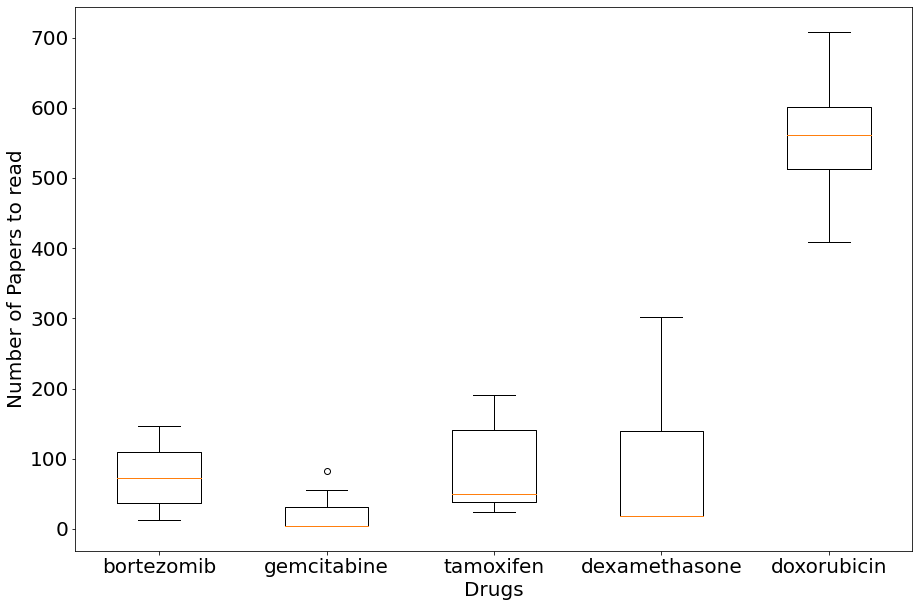

In [11]:
plt.figure(figsize=(15, 10))
plt.boxplot([np.array(res2[drug]) for drug in res2], labels = [drug for drug in res2])
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.xlabel("Drugs", fontsize= 20)
plt.ylabel("Number of Papers to read", fontsize= 20)